In [3]:
import IPython.display as ipd
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

import extract_features
import utilty

# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (8, 3)
ipd.display(ipd.HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
track = utilty.get_audio_tracks()[0]
# track = utilty.find_file('without')

sec = 30
duration = utilty.get_duration(track)
segments = int(duration) // sec
audio_30secs = [lr.load(track, offset=sec*i, duration=sec) for i in range(segments)]
name = track.stem.split('-')[-1].replace('_', ' ').title()
track

PosixPath('/Users/matteding/Desktop/Whabam/tracks/eminem-1996-infinite-01-infinite.mp3')

In [4]:
chroma_syncs = [utilty.beat_synchronous_chroma(audio) for audio, _ in audio_30secs]
chromas, _ = zip(*chroma_syncs)

In [5]:
bounds = [lr.segment.agglomerative(chroma, 20) for chroma in chromas]
bound_widths = np.diff(bounds)

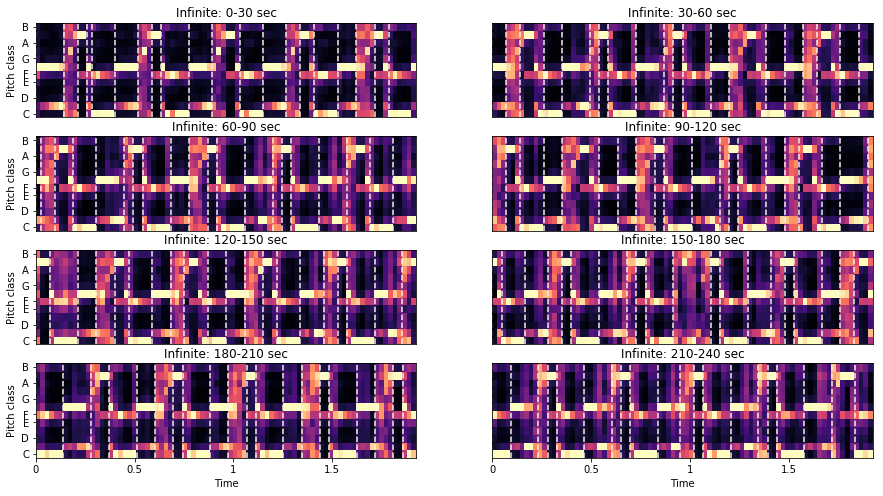

In [6]:
cols = 2
size = int(np.ceil(segments / cols))
fig, axes = plt.subplots(size, cols, figsize=(15, size*2))

for i, ((chroma, beat), bound_f, axis) in enumerate(zip(chroma_syncs, bounds, axes.ravel())):    
    lr.display.specshow(chroma, ax=axis, x_axis='time', y_axis='chroma')#, x_coords=beat)
    
    bound_t = lr.frames_to_time(bound_f)
    axis.vlines(bound_t, 0, chroma.shape[0], color='linen', linestyle='--')
    
    utilty.label_formatter(axis)
    axis.set_title(f'{name}: {30*i}-{30*(i+1)} sec')

In [7]:
bound_width_aggs = utilty.get_aggregations(bound_widths, axis=0)
chroma_aggs = [utilty.get_aggregations(chroma, axis=1) for chroma in chromas]

In [8]:
assert bound_widths.shape[0] == len(chroma_aggs) == segments

In [9]:
chroma_aggs[0].mean.shape # 12 for each note in chromatic scale

(12,)

In [12]:
chroma_aggs[-1]

Aggregations(mean=array([0.56560627, 0.44195134, 0.15584324, 0.17338115, 0.2143727 ,
       0.52625282, 0.53486027, 0.23148062, 0.22865543, 0.25359709,
       0.42313199, 0.30289491]), median=array([0.52822157, 0.37346242, 0.12432003, 0.15053349, 0.20463114,
       0.53396712, 0.45490837, 0.19027602, 0.14603511, 0.17389117,
       0.27177681, 0.26370386]), mode=array([1.        , 1.        , 0.06890067, 0.07596095, 0.04123307,
       0.30486378, 1.        , 0.02574942, 0.02984833, 0.37244799,
       1.        , 0.03817751]), amax=array([1.        , 1.        , 0.52661779, 0.44681558, 0.42426507,
       1.        , 1.        , 0.54529337, 0.76561206, 0.91166118,
       1.        , 0.8693378 ]), amin=array([0.0438375 , 0.05311189, 0.053276  , 0.03764353, 0.04123307,
       0.17344207, 0.05170242, 0.02574942, 0.02984833, 0.03951493,
       0.04781772, 0.03817751]), std=array([0.36330137, 0.28577969, 0.08541175, 0.10141811, 0.09729939,
       0.20757455, 0.36000324, 0.14056037, 0.17590753,

In [21]:
extract_features.chroma_aggs(audio_30secs[-1][0])['C']

Aggregations(mean=0.5656062703922811, median=0.5282215676112602, mode=1.0, amax=1.0, amin=0.0438374977854497, std=0.36330137254564665, sum=46.94532044255933, prod=9.96236138916864e-33)

In [20]:
from importlib import reload
reload(utilty)
reload(extract_features);